<a href="https://colab.research.google.com/github/ajlorenzetti/Main/blob/main/CSE_5713_Final_K_Means_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gzip
import shutil
import os

import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

np.random.seed(42)

In [ ]:
X_C = pd.read_csv('combine_data 2.csv',index_col=1)
X_C

In [ ]:
X_A = X_A.drop('Unnamed: 0', axis = 1)

In [ ]:
X_A

,AAACCCAGTCTTACTT,AAACGAACAAGGCGTA,AAACGAAGTCACGACC,AAAGAACCAACTCGTA,AAAGGTAAGAAGTCCG,AAAGGTATCACCGCTT,AAAGTCCGTGCATTTG,AAATGGACACAATGTC,AAATGGAGTGGGACAT,AACAAAGGTTGCTTGA,AACACACTCCATAAGC,AACACACTCTACAGGT,AACCAACAGAGCACTG,AACCAACCAATGCTCA,AACCACAGTGTAAACA,AACCCAATCAACTACG,AACCCAATCAGGAGAC,AACCCAATCTAGAACC,AACCTGACAAGGATGC,AACCTGACAGGCCTGT,AACCTTTGTAGCGTCC,AACTTCTCACCCTATC,AACTTCTGTCTTACTT,AAGAACAAGCTTGTGT,AAGACAACATCGTGCG,AAGACAAGTTAGGCCC,AAGACAATCAGCGCGT,AAGCCATAGCGTATAA,AAGCCATCACCGTCTT,AAGCGTTCAGCTCGGT,AAGGAATCAATGCTCA,AAGTACCGTGCAGATG,AAGTTCGAGCAGCAGT,AAGTTCGTCCTTCTAA,AATAGAGCATGTGCCG,AATCACGCAGTTCACA,AATCGACAGGCACGAT,AATCGACGTTCCAGGC,AATGGAACAGTGAGCA,AATGGAACAGTTCTAG,...,TTTACGTTCGGACAAG,TTTACGTTCTTCTGTA,TTTACTGAGAGGCGGA,TTTACTGAGGTTCCAT,TTTACTGGTTCGTGCG,TTTAGTCAGCTCGCAC,TTTAGTCAGTCAACAA,TTTAGTCCAATCGCAT,TTTATGCAGAAACTAC,TTTATGCAGCCACAAG,TTTATGCAGCTCTGTA,TTTATGCAGGTGCCAA,TTTATGCCAGCACAAG,TTTATGCGTGTTACTG,TTTATGCGTTCAATCG,TTTATGCGTTTCAGAC,TTTATGCTCAACCTTT,TTTATGCTCACAAGGG,TTTATGCTCGTGAGAG,TTTCACATCAACCTCC,TTTCAGTAGACCGTTT,TTTCAGTGTAACGATA,TTTCAGTTCACACGAT,TTTCGATAGTCGCCCA,TTTCGATGTTTGACAC,TTTCGATTCACTGCTC,TTTCGATTCTAGCATG,TTTGACTAGCCTGAGA,TTTGATCCAATGCTCA,TTTGATCCATGCACTA,TTTGATCGTCGGCCTA,TTTGGAGCAGTGTACT,TTTGGAGTCGAACGCC,TTTGGTTAGGTGAGAA,TTTGGTTAGGTGGCTA,TTTGGTTCACCGGTCA,TTTGGTTGTCTGTAGT,TTTGGTTGTGGTGATG,TTTGGTTTCGCTGATA,TTTGTTGTCCGTAGTA
Unnamed: 0_cancer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1CF,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
A4GALT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AAAS,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AACS,0,0,5,0,0,0,0,0,0,0,1,1,3,0,2,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AADAC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZXDC,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
A_label = pd.read_csv('lorenzetti_label (2).csv', index_col = 0)
A_y1 = A_label.T
A_y_T = A_y1.drop(0,axis =1)
A_X_T = X_A
A_X = A_X_T.T
A_y = A_y_T.T

In [ ]:
A_X.shape

(3282, 14837)

In [ ]:
A_y.shape

(3282, 1)

In [ ]:
train = StandardScaler().fit_transform(A_X)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

In [ ]:
from sklearn.model_selection import train_test_split

A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(pca_res, A_y, test_size=0.33, random_state=42)

In [ ]:
#wcss = []
#for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(X_A.iloc[:,:])
    #wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_predic = clusterer.fit_predict(pca_res)
centers = clusterer.cluster_centers_

In [ ]:
def GetCluster(X, random_seed = 10, cluster_n_range = [3,4,5], method = 'KMeans', show = True):
    score = []
    for n in cluster_n_range:
        if method == 'KMeans':
            clusterer = KMeans(n_clusters=n, random_state=random_seed)
            cluster_predic = clusterer.fit_predict(X[:,:])
            centers = clusterer.cluster_centers_
        else:
            clusterer = GaussianMixture(n_components=n, random_state=random_seed)
            cluster_predic = clusterer.fit_predict(X[:,:])
            centers = clusterer.means_
        silhouette_avg = silhouette_score(X[:,:], cluster_predic)
        score.append(silhouette_avg)

        if show:
            print("When #clusters = ", n, " ,the average sihouette_score = ", silhouette_avg)
            fig, (ax) = plt.subplots(1, 1)
            col = cm.nipy_spectral(cluster_predic.astype(float) / n)
            ax.scatter(X[:,0], X[:,1], marker = '.', c = col, cmap=plt.cm.Paired)
            ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
            for i, c in enumerate(centers):
                plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
            ax.set_title("The visualization of %s with numbers of clusters = %d, the average sihouette_score = %f" % (method,n,silhouette_avg))
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            plt.show()
        else:
            return score

In [ ]:
pca_res.shape

(3282, 2)

When #clusters =  3  ,the average sihouette_score =  0.728642112320939


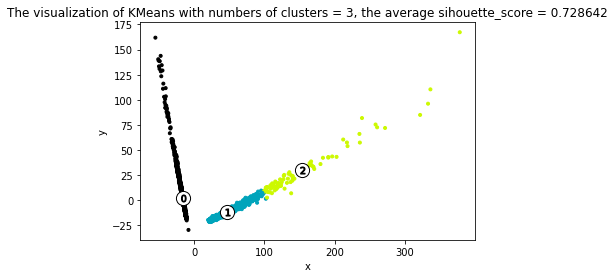

When #clusters =  4  ,the average sihouette_score =  0.7267584814004938


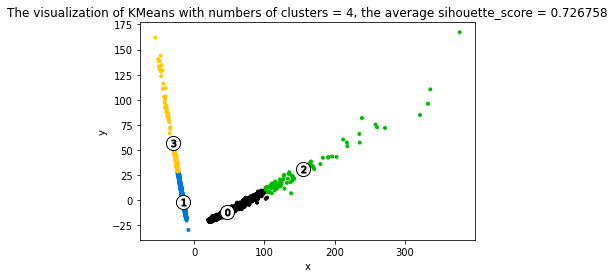

When #clusters =  5  ,the average sihouette_score =  0.7255288029130451


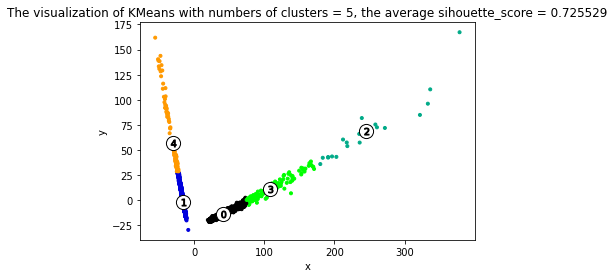

In [ ]:
GetCluster(pca_res)

When #clusters =  3  ,the average sihouette_score =  0.7256364199029323


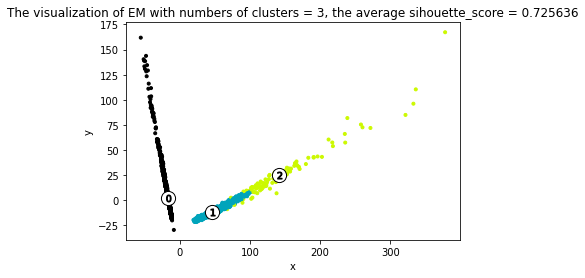

When #clusters =  4  ,the average sihouette_score =  0.7008615869439155


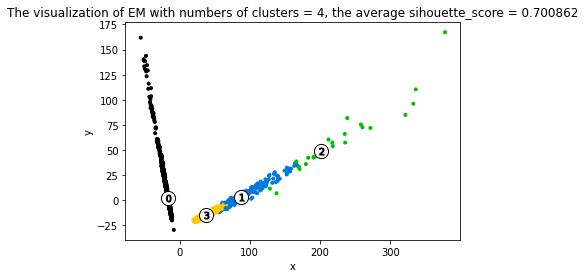

When #clusters =  5  ,the average sihouette_score =  0.6621038850826311


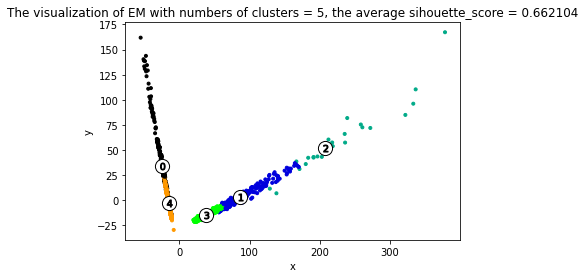

In [ ]:
GetCluster(pca_res, method = "EM")